In [1]:
import pandas as pd

In [2]:
test_sales = pd.read_csv('https://raw.githubusercontent.com/training-ml/Task/main/Test_Sales_LinReg.csv')

In [3]:
test_sales.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [5]:
test_sales.shape

(305, 6)

In [6]:
test_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Republic  295 non-null    float64
 1   NDTV      300 non-null    float64
 2   TV5       305 non-null    float64
 3   TV9       297 non-null    float64
 4   AajTak    300 non-null    float64
 5   sales     305 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


In [9]:
import matplotlib.pyplot as plt

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import warnings 
warnings.filterwarnings('ignore')


In [20]:
test_sales.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [24]:
test_sales['Republic']=test_sales['Republic'].fillna(test_sales['Republic'].mean())
test_sales['NDTV']=test_sales['NDTV'].fillna(test_sales['NDTV'].mean())
test_sales['TV9']=test_sales['TV9'].fillna(test_sales['TV9'].mean())
test_sales['AajTak']=test_sales['AajTak'].fillna(test_sales['AajTak'].mean())

In [25]:
test_sales.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


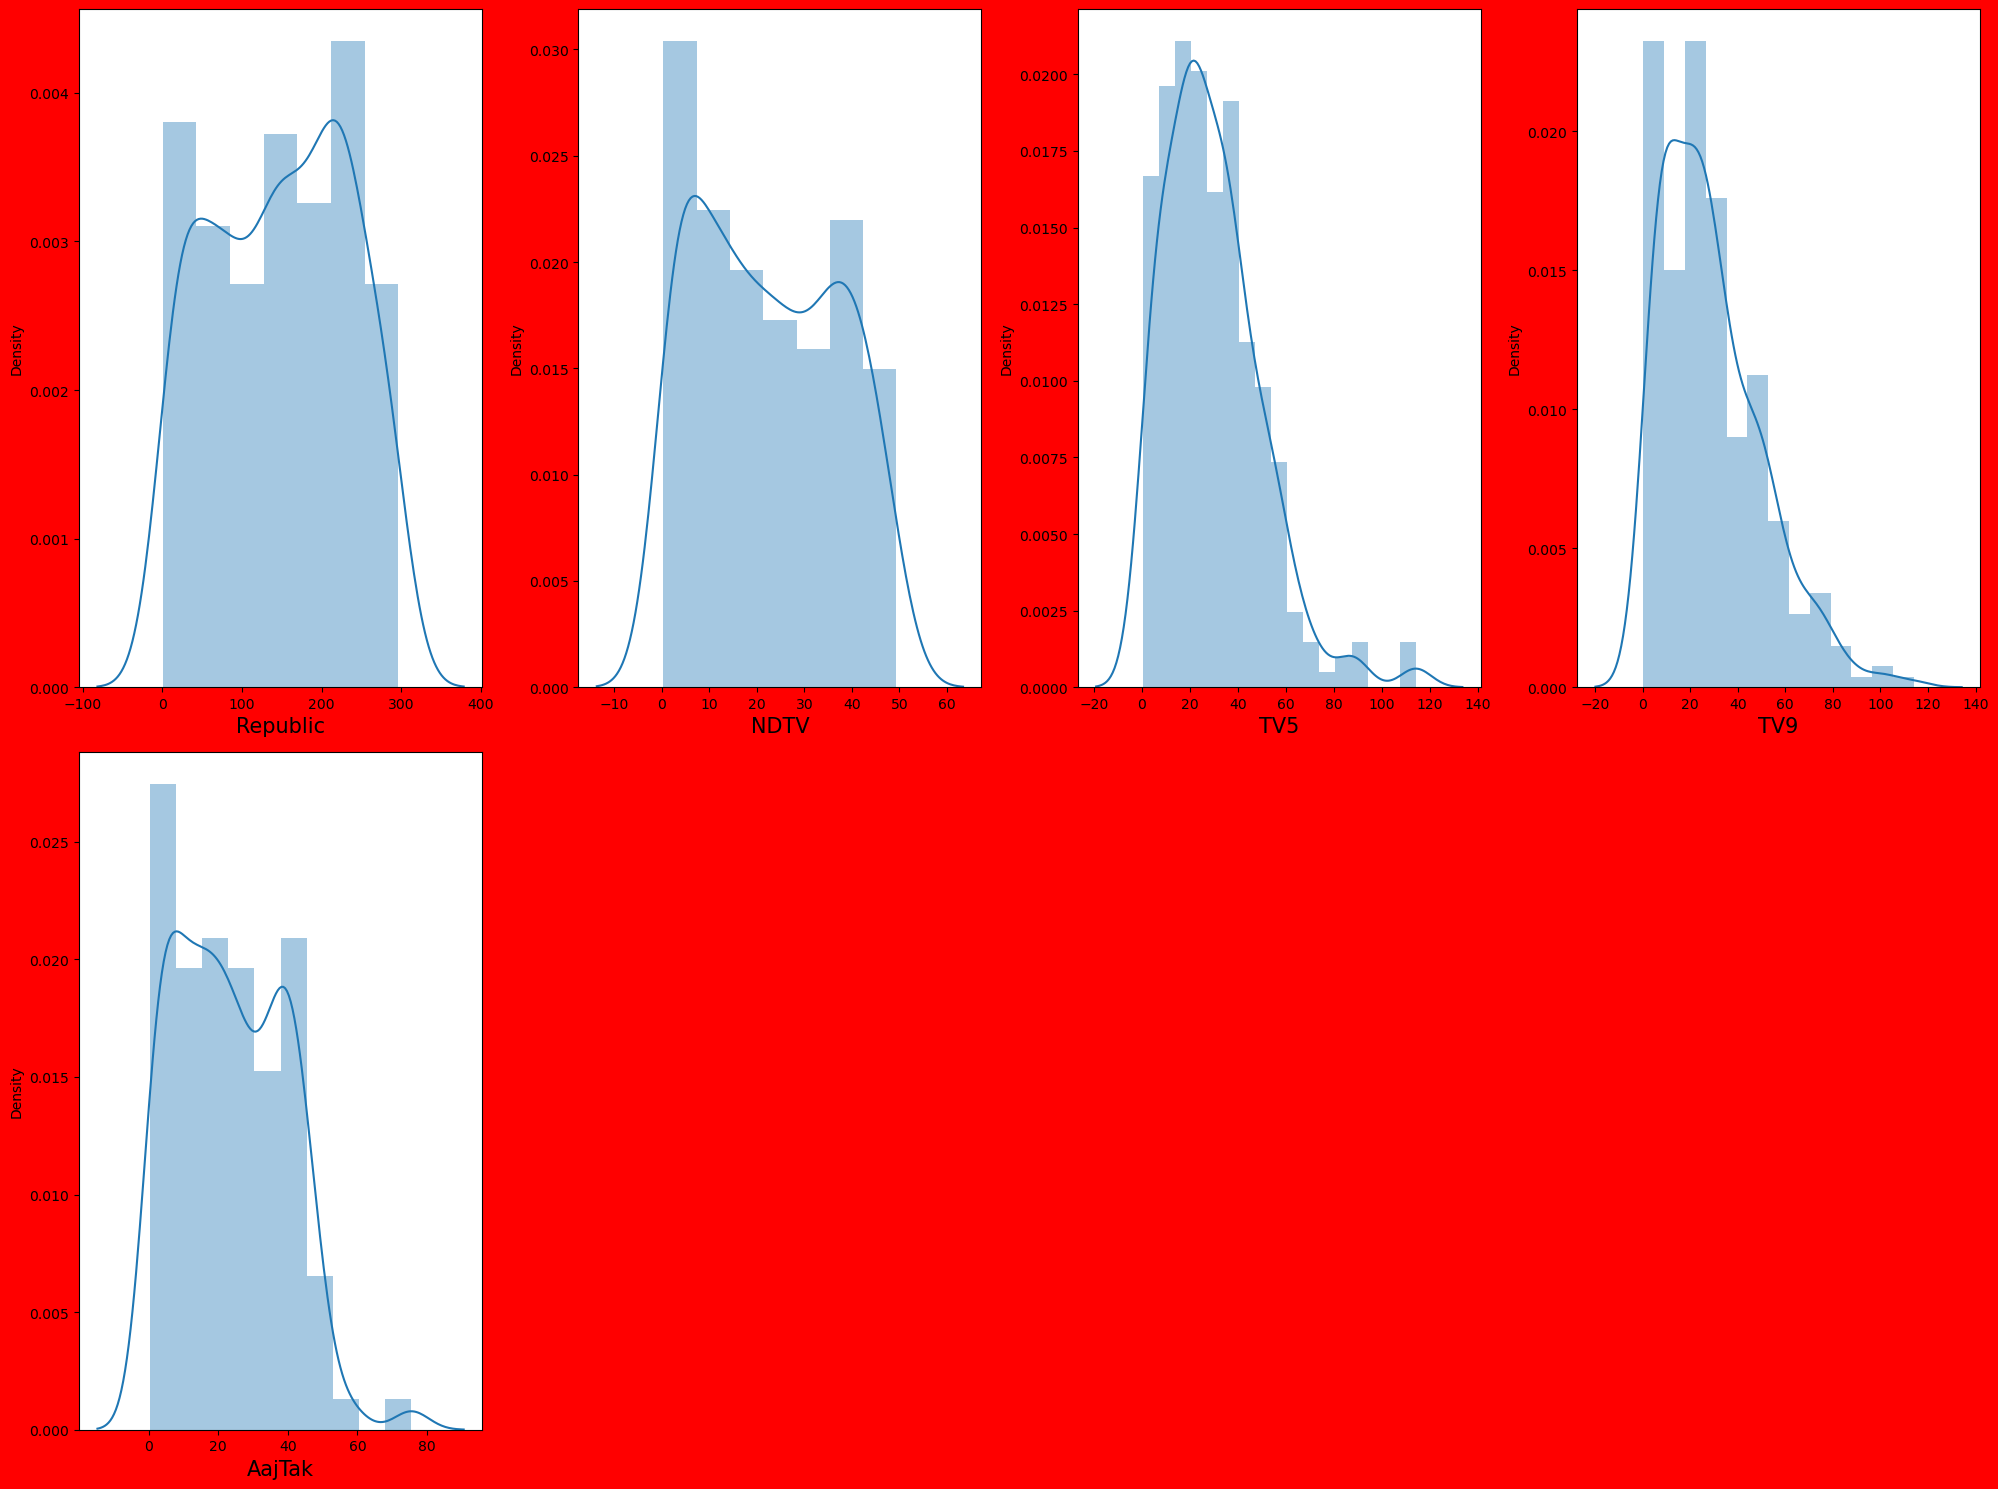

In [29]:
plt.figure(figsize=(20,15), facecolor ='red')
plotnumber = 1

for column in test_sales:
    if plotnumber <=5:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(test_sales[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

In [30]:
y= test_sales['sales']
x=test_sales.drop(columns=['sales'])

In [31]:
y

0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
300    15.9
301     6.7
302    10.8
303     9.9
304     5.9
Name: sales, Length: 305, dtype: float64

In [32]:
x

,Republic,NDTV,TV5,TV9,AajTak
0,8.7,48.9,4.0,75.0,49.0
1,57.5,32.8,65.9,23.5,57.5
2,120.2,19.6,7.2,11.6,18.5
3,8.6,2.1,46.0,1.0,2.6
4,199.8,2.6,52.9,21.2,2.9
...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9
301,18.7,12.1,23.7,23.4,18.7
302,39.5,41.1,17.6,5.8,39.5
303,75.5,10.8,8.3,6.0,75.5


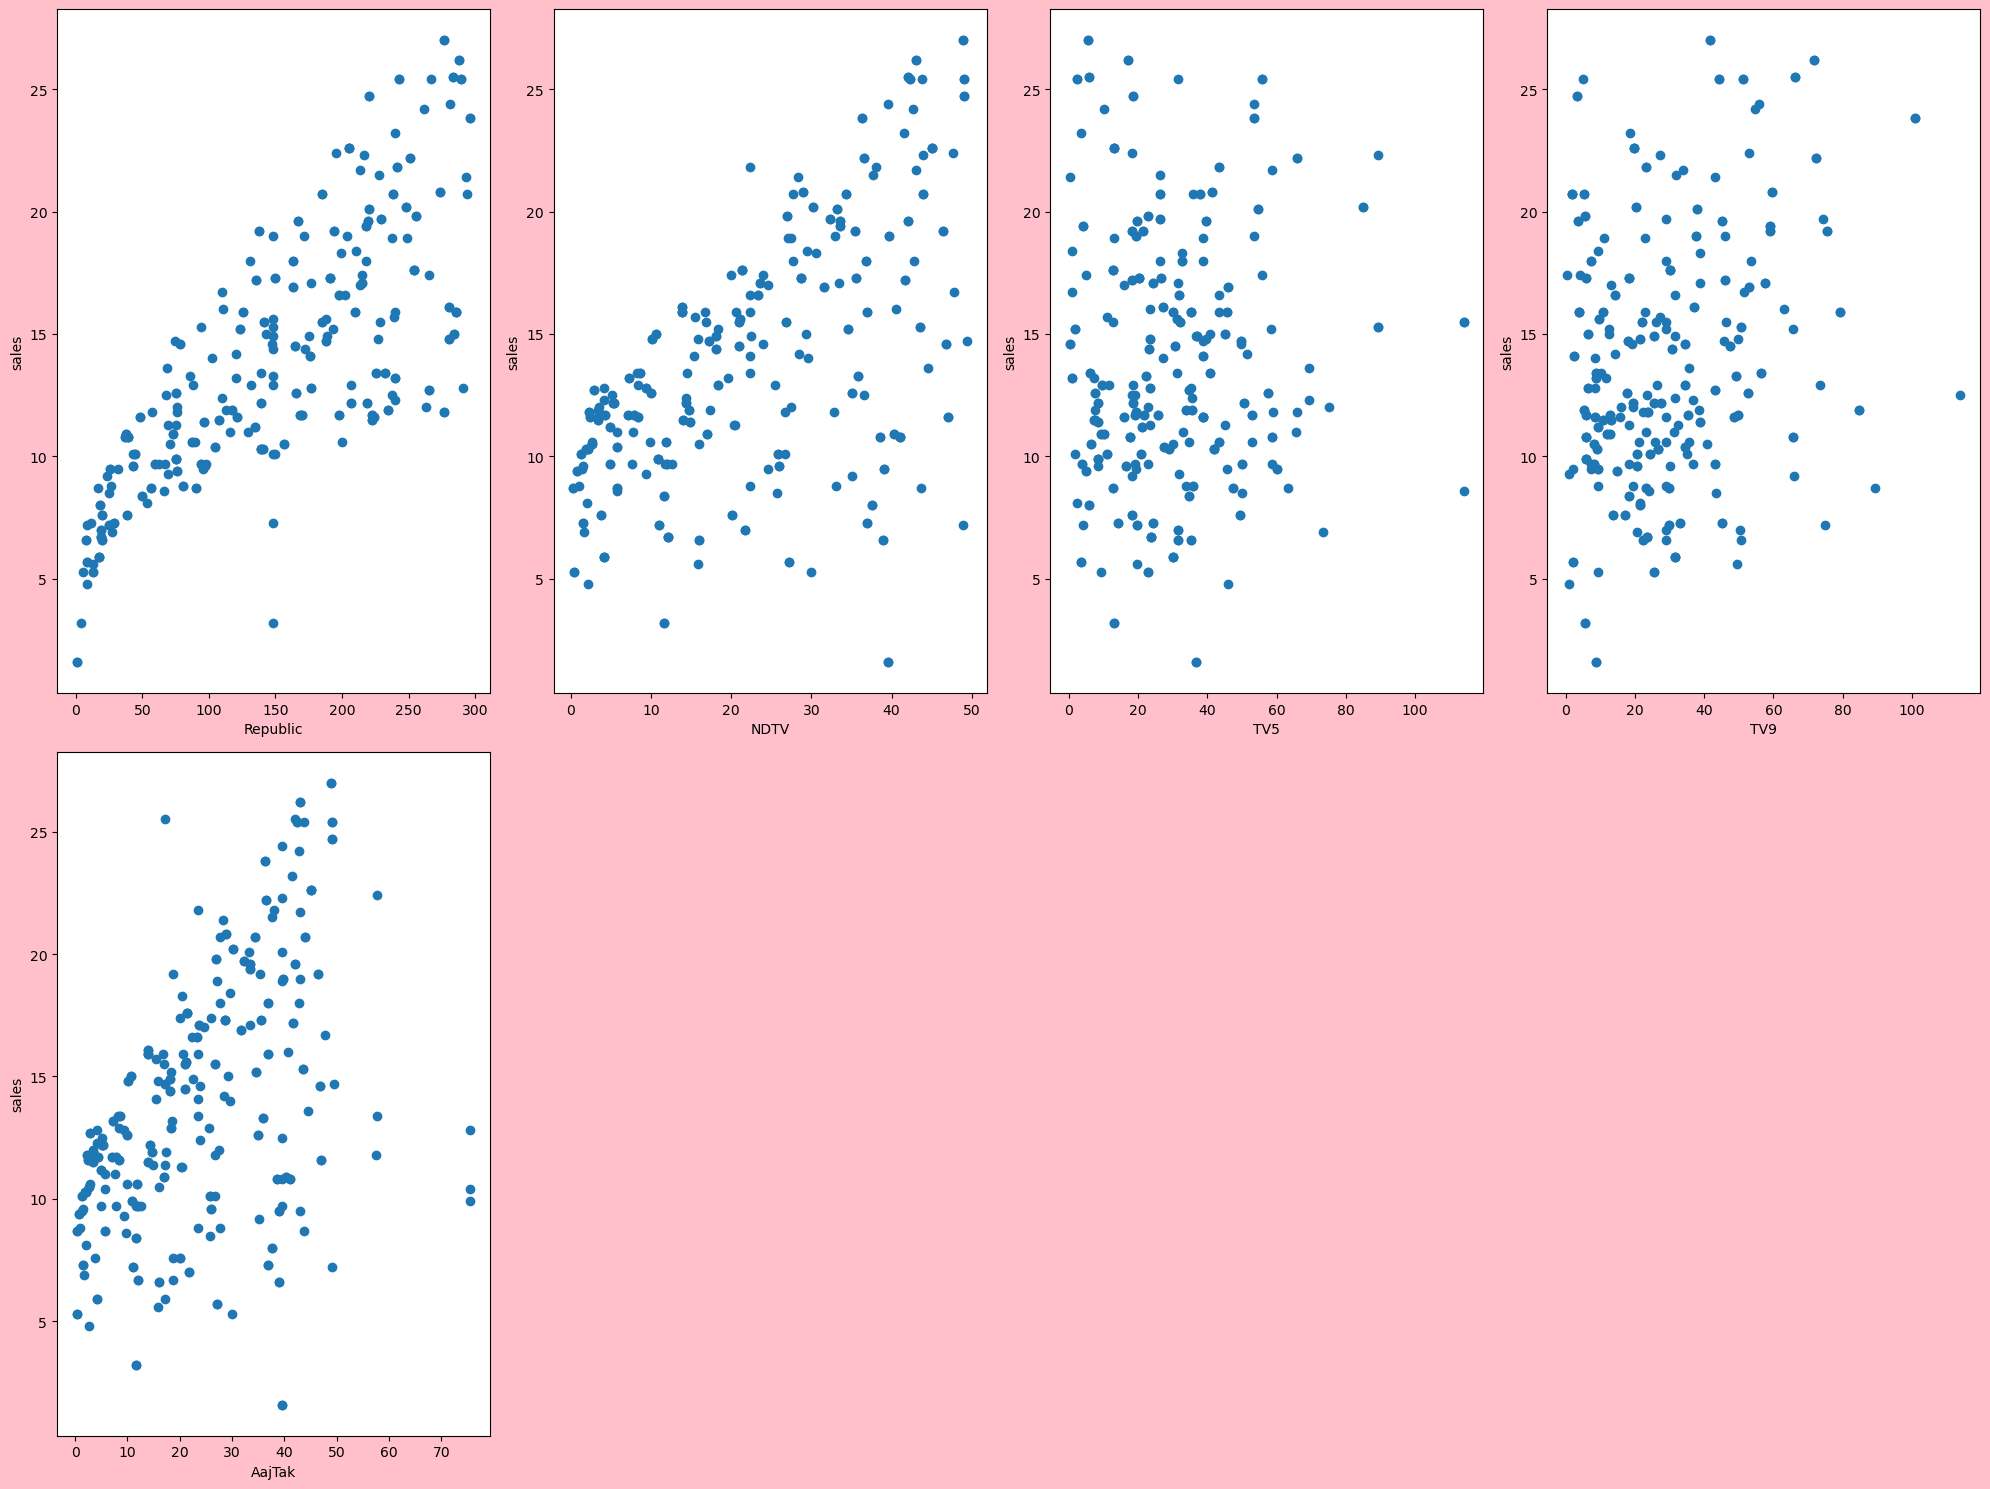

In [33]:
plt.figure(figsize=(20,15), facecolor ='pink')
plotnumber = 1

for column in x :
    if plotnumber <=5:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('sales',fontsize =10)
    plotnumber +=1
plt.tight_layout()

In [35]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
x_scaled

array([[-1.62625562,  1.81463603, -1.25683363,  2.18734018,  1.62336179],
       [-1.05709897,  0.71459436,  1.79894035, -0.25423831,  2.16486391],
       [-0.32582597, -0.18730316, -1.09886147, -0.81840887, -0.31967525],
       ...,
       [-1.2670338 ,  1.28169659, -0.58545195, -1.09338276,  1.01815353],
       [-0.84716414, -0.78856818, -1.04455854, -1.0839009 ,  3.3115743 ],
       [-1.52711973, -1.24634949,  0.02669017,  0.12977695, -0.40249322]])

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=200)
y_train.head()

167    12.2
214    15.9
209    15.9
164    11.8
5       8.6
Name: sales, dtype: float64

In [38]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [39]:
test_sales.tail(3)

,Republic,NDTV,TV5,TV9,AajTak,sales
302,39.5,41.1,17.6,5.8,39.5,10.8
303,75.5,10.8,8.3,6.0,75.5,9.9
304,17.2,4.1,30.0,31.6,17.2,5.9


In [40]:
print('test_sales : ',regression.predict(scaler.transform([[39.5,41.1,17.6,5.8,39.5]])))

test_sales :  [12.08804575]


In [41]:
##Adjusted r2 score

regression.score(x_train,y_train)

0.8660935859283262

In [42]:
regression.score(x_test,y_test)

0.8851185649104529

In [43]:
x_test[1]

array([ 3.31483710e-16, -2.89791517e-01, -3.13937297e-01,  8.71085861e-02,
       -3.45157702e-01])

In [44]:
y_pred=regression.predict(x_test)

In [45]:
y_pred

array([12.5762751 , 13.01689535, 14.82610942, 17.98041067, 10.27791857,
       18.02226895, 16.73280489, 22.6174403 ,  7.43249422, 17.37992008,
       17.21137558, 22.77388186, 10.41158232, 14.40864218, 18.22180096,
       12.91615293, 24.31124644, 10.59840482, 21.57074893,  6.8965216 ,
        5.20486973,  6.25113032, 11.32365135, 18.49943481, 15.19441981,
       14.77673731,  7.13777663, 23.13927533, 13.58808039, 16.28300803,
       20.79366168,  9.02410145, 23.55572893, 11.61258831, 16.87899259,
       12.91858369, 10.26218617, 15.01624847, 12.17861327,  8.68059869,
       18.17625656, 12.16910112,  7.66295648,  6.50964238,  8.65396149,
       20.12792628, 13.96125533,  3.77781804,  9.79315699,  7.98438261,
       11.8348599 , 15.65880642, 10.16063868, 17.93593579,  4.95608052,
       16.06466162,  8.21943082, 17.93593579, 15.07254777, 16.06826106,
       19.02594269,  4.8058615 , 17.52952732, 10.35824802, 12.16910112,
       19.02594269, 16.92879485,  9.64165846, 16.34755874, 13.45

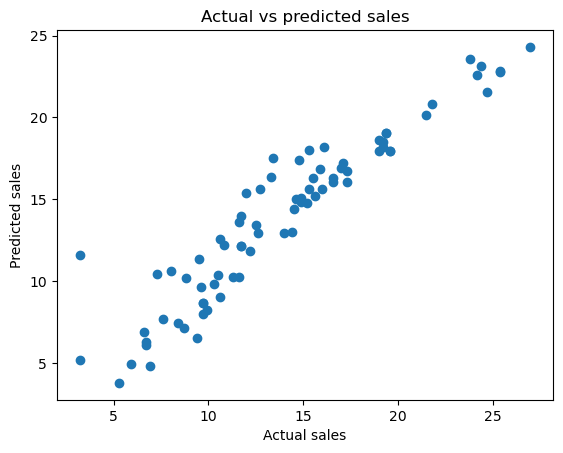

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual vs predicted sales')
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [49]:
y_pred = regression.predict(x_test)

In [50]:
mean_absolute_error(y_test,y_pred)

1.3618472561980908

In [51]:
mean_squared_error(y_test,y_pred)

3.443257994447242

In [52]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.8556017876816249